In [1]:
import MeCab
import re
from gensim.models import word2vec
from matplotlib import pyplot
from sklearn.decomposition import PCA
import numpy as np

In [2]:
stop_words = []
with open('ja_stopwords.txt','r',encoding='utf-8')as f_stopwords:
    for line in f_stopwords:
        line  =line.replace('\r','').replace('\n','').strip()
        stop_words.append(line)

stop_words = set(stop_words)  #去重
print(len(stop_words))

142


In [3]:
tagger_owakati = MeCab.Tagger('-Owakati')
raw_word_list = []
sentence_owakati = []
rules = u'([\u3040-\u9faf]+)'
pattern = re.compile(rules)#正则
count = 0
f_writer = open('挪威的森林_pro.txt','w',encoding = 'utf-8')
with open('挪威的森林.txt','r',encoding = 'utf-8')as f_reader:
    lines = f_reader
    for line in lines:
        line = line.replace('\r',' ').replace('\n',' ').strip()
        if line == '' or line is None:
            continue
        line = ''.join(tagger_owakati.parse(line))
        seg_list = pattern.findall(line)
        sentence_owakati.append(seg_list)
        word_list = []
        for word in seg_list:
            if word not in stop_words:
                word_list.append(word)
        if len(word_list)>0:
            raw_word_list.extend(word_list)
            line = ' '.join(word_list)
            f_writer.write(line+'\n')
            f_writer.flush()

f_writer.close()
print(raw_word_list[:30])
print('text file has',len(raw_word_list),'words')
print('text file has',len(set(raw_word_list)),'vocabularies')
print(sentence_owakati[:10])
vocabulary_size = len(set(raw_word_list))
#     for line in f_reader:
#         line = line.replace('\r','').replace('\n','').strip()

['ノルウェー', '森', '村上', '春樹', '第', '一', '章', '僕', '三十', '七', '歳', 'ボーイング', 'シート', '座っ', '巨大', '飛行', '機', 'ぶ厚い', '雨雲', 'くぐり抜け', '降下', 'ハンブルク', '空港', '着陸', 'しよう', '十', '一', '月', '冷ややか', '雨']
text file has 76346 words
text file has 8875 vocabularies
[['ノルウェー', 'の', '森'], ['村上', '春樹'], ['第', '一', '章'], ['僕', 'は', '三十', '七', '歳', 'で', 'その', 'とき', 'ボーイング', 'の', 'シート', 'に', '座っ', 'て', 'い', 'た', 'その', '巨大', 'な', '飛行', '機', 'は', 'ぶ厚い', '雨雲', 'を', 'くぐり抜け', 'て', '降下', 'し', 'ハンブルク', '空港', 'に', '着陸', 'しよう', 'と', 'し', 'て', 'いる', 'ところ', 'だっ', 'た', '十', '一', '月', 'の', '冷ややか', 'な', '雨', 'が', '大地', 'を', '暗く', '染め', '雨合羽', 'を', '着', 'た', '整備', '工', 'たち', 'や', 'のっぺり', 'と', 'し', 'た', '空港', 'ビル', 'の', '上', 'に', '立っ', 'た', '旗', 'や', 'の', '広告', '板', 'や', 'そんな', '何', 'も', 'か', 'も', 'を', 'フランドル', '派', 'の', '陰うつ', 'な', '絵', 'の', '背景', 'の', 'よう', 'に', '見せ', 'て', 'い', 'た', 'やれ', 'やれ', 'また', 'ドイツ', 'か', 'と', '僕', 'は', '思っ', 'た'], ['飛行', '機', 'が', '着地', 'を', '完了', 'する', 'と', '禁煙', 'の', 'サイン', 'が', '消え', '天井', 'の', 'スピー

In [4]:
text = []
with open('挪威的森林_pro.txt','r',encoding = 'utf-8')as f:
    lines = f
    for line in lines:
        line = line.replace('\n',' ').strip()
        text.append(line.split(' '))
        
print(text[:10])
        

[['ノルウェー', '森'], ['村上', '春樹'], ['第', '一', '章'], ['僕', '三十', '七', '歳', 'ボーイング', 'シート', '座っ', '巨大', '飛行', '機', 'ぶ厚い', '雨雲', 'くぐり抜け', '降下', 'ハンブルク', '空港', '着陸', 'しよう', '十', '一', '月', '冷ややか', '雨', '大地', '暗く', '染め', '雨合羽', '着', '整備', '工', 'のっぺり', '空港', 'ビル', '上', '立っ', '旗', '広告', '板', 'そんな', 'フランドル', '派', '陰うつ', '絵', '背景', '見せ', 'やれ', 'やれ', 'ドイツ', '僕', '思っ'], ['飛行', '機', '着地', '完了', '禁煙', 'サイン', '消え', '天井', 'スピーカー', '小さな', '音', '流れ', 'はじめ', 'オーケストラ', '甘く', '演奏', 'ビートルズ', 'ノルウェイ', '森', 'メロディー', 'いつ', '僕', '混乱', 'いや', 'いつ', '比べもの', 'くらい', '激しく', '僕', '混乱', '揺り動かし'], ['僕', '頭', 'はりさけ', 'しまわ', '身', 'かがめ', '両手', '顔', '覆い', 'まま', 'じっと', 'やがて', 'ドイツ', '人', 'スチュワーデス', 'やっ', '気分', 'わるい', '英語', '訊い', '大丈夫', '少し', '目まい', 'だけ', '僕', '答え'], ['本当', '大丈夫'], ['大丈夫', 'ありがとう', '僕', '言っ', 'スチュワーデス', 'にっこり', '笑っ', '行っ', 'しまい', '音楽', 'ビリー', '・', 'ジョエル', '曲', '変っ', '僕', '顔', '上げ', '北海', '上空', '浮かん', '暗い', '雲', '眺め', '自分', '人生', '過程', '失っ', '多く', '考え', '失わ', '時間', '死に', 'あるいは', '去っ', 'いっ', '人', 'もう', '戻る', '想い'],

In [5]:
model = word2vec.Word2Vec(text,window=3,vector_size=200,epochs=5,min_count=3)

In [16]:
for e in model.wv.most_similar(positive=['聞く'],topn = 20):
    print(e[0],e[1])

性 0.9946619868278503
風 0.994656503200531
結局 0.9945735335350037
缶 0.9945663809776306
急 0.9945502877235413
つづけ 0.9945431351661682
音 0.9945380091667175
次 0.9945201277732849
入れ 0.9945188760757446
持っ 0.9945164918899536
少し 0.994504988193512
だり 0.9944945573806763
しまっ 0.9944899678230286
我 0.9944837093353271
まま 0.9944828748703003
女の子 0.9944807887077332
草原 0.9944742321968079
つけ 0.9944732785224915
風景 0.9944725036621094
空気 0.9944705367088318


In [7]:
model.save('挪威的森林_pro_window=3,vector_size=200,epochs=5.model')

In [11]:
li = []

X = np.array(li)
X.tolist()

[]

In [8]:
from sklearn.datasets import load_breast_cancer
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from time import time
import datetime
from sklearn.preprocessing import StandardScaler

In [9]:
all_vectors = []
labels = []
with open('C1.txt','r',encoding='utf-8')as f_C1:
    for word in f_C1:
        word = word.replace('\n',' ').strip()
        all_vectors.append(model.wv[word].tolist())
        labels.append(1)

with open('C2.txt','r',encoding='utf-8')as f_C2:
    for word in f_C2:
        word = word.replace('\n',' ').strip()
        all_vectors.append(model.wv[word].tolist())
        labels.append(0)

    

labels


[1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0]

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0])

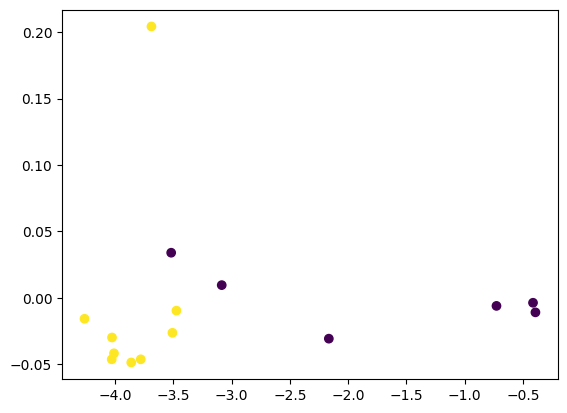

In [11]:
X = np.array(all_vectors)
y = np.array(labels)

X_pca=PCA(n_components=3).fit(X)
X_pca.components_
new_X = X.dot(PCA(n_components=2).fit(X).components_.T)

plt.scatter(new_X[:,0],new_X[:,1],c=y)
X = StandardScaler().fit_transform(X)
y

In [13]:
Xtrain,Xtest,Ytrain,Ytest = train_test_split(X,y,test_size=0.5,random_state=420)
Kernel = ['linear','poly','rbf','sigmoid']
for kernel in Kernel:
    time0 = time()
    clf = SVC(kernel = kernel,
             gamma = 'auto',
             degree = 1,
             cache_size = 4000#允许使用多大MB内存进行计算
             ).fit(Xtrain,Ytrain)
    print('the accuracy under kernel %s is %f' % (kernel,clf.score(Xtest,Ytest)))
    print(datetime.datetime.fromtimestamp(time()-time0).strftime('%M:%S:%f'))

the accuracy under kernel linear is 0.875000
00:00:002000
the accuracy under kernel poly is 0.750000
00:00:002000
the accuracy under kernel rbf is 0.875000
00:00:002001
the accuracy under kernel sigmoid is 0.875000
00:00:002013


In [20]:
clf = SVC(kernel = "linear",cache_size=4000).fit(Xtrain,Ytrain)
clf.predict(StandardScaler().fit_transform(model.wv[word]))

ValueError: Expected 2D array, got 1D array instead:
array=[ 0.00740225 -0.00060684  0.0154914   0.04185415  0.05642638 -0.05980025
  0.03132426  0.11961728  0.01165303  0.05923001  0.01278996 -0.04524223
  0.0364403   0.04902193 -0.00147517 -0.04096277 -0.01131244 -0.01951887
 -0.04076281 -0.07598071  0.03856166 -0.04882585 -0.00274985 -0.02446436
 -0.02778006 -0.06688131  0.03146665 -0.07429451 -0.06906028  0.01161224
  0.02899863  0.02390042  0.04180937  0.01939093  0.04484257  0.05528368
  0.08249737  0.00835865 -0.03301043 -0.07998975 -0.09213667 -0.03479086
  0.01244231  0.05987412  0.08283348 -0.01573294 -0.01117092  0.0020028
  0.08286034  0.05465185  0.00019511  0.00453544 -0.03557225 -0.07162321
  0.02481771 -0.03808089  0.01969976 -0.04123593 -0.07496928  0.03352774
 -0.0404573   0.00595041 -0.01955279 -0.02137154 -0.06455904  0.02952619
  0.00648533  0.11487453 -0.08920498  0.08306337 -0.01839175 -0.04759319
  0.04477442 -0.00149957  0.02353897  0.03695494  0.0569111  -0.0859177
 -0.09718906 -0.00649465 -0.02300217 -0.03155258 -0.06043227  0.11022184
 -0.03384162 -0.00143999 -0.03676051  0.07143147  0.02624944 -0.01567427
 -0.00919802  0.07613655  0.05433426  0.1077731   0.12002726  0.07190107
 -0.00403843 -0.05702122  0.03162637  0.04444126 -0.0819058   0.10078648
  0.00021429 -0.0165881  -0.09191566 -0.0951907   0.03802162  0.05976304
 -0.01076544 -0.07211087 -0.0128265  -0.10857219 -0.06422639 -0.03529445
  0.01439636 -0.06657856  0.01825007 -0.08398705 -0.00248368 -0.03122997
  0.03682434  0.08539966  0.06583509 -0.04682753 -0.02848773  0.03380731
 -0.03725749  0.00866445  0.01624778 -0.03114585  0.02512216  0.01259348
 -0.01954553 -0.0475889  -0.06519596  0.08057088 -0.07282612 -0.09304348
 -0.0107456  -0.11115655  0.05916814 -0.12956743 -0.08434959 -0.00455722
 -0.01782653 -0.02224425 -0.01641033  0.02498358 -0.01947048  0.00617522
  0.03992978 -0.07317637  0.0055127   0.06522111 -0.1036697   0.08994379
  0.04515226  0.02779987 -0.01812454  0.01168566  0.03658051  0.03900959
 -0.04175603 -0.01509227 -0.05955069  0.05654202  0.03453068 -0.05571755
 -0.01073673  0.06403903 -0.07421023  0.02393133  0.01203954 -0.05134349
  0.05309188  0.04063322 -0.08010907  0.00771624 -0.00579119  0.04032541
  0.00919525  0.02998818  0.00243715  0.00912639  0.04088658  0.02106404
 -0.04393486  0.00538762  0.07567865  0.00284737  0.01060646 -0.03230518
 -0.00551191 -0.02615348  0.03393815  0.01675438  0.05695494 -0.0576898
 -0.02886539 -0.00910961].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.